In [ ]:
# pip install opencv-python dlib


In [ ]:
# pip install opencv-python numpy matplotlib


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def detect_teeth(face,image):
    # Get the coordinates of the face bounding box
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())

    # Extract the region of interest (ROI) containing the face
    face_roi = image[y:y + h, x:x + w]

    # Draw a rectangle around the detected face
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    smile_region = image[y + h // 2:y + h, x:x + w]
    cv2.rectangle(image, (x, y + h // 2), (x + w, y + h), (255, 0, 0), 2)
    
    # Convert the cropped region to grayscale
    gray_smile = cv2.cvtColor(smile_region, cv2.COLOR_BGR2GRAY)


    # Use Otsu's thresholding to calculate an optimal threshold
    # _, threshold = cv2.threshold(gray_smile, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, threshold = cv2.threshold(gray_smile, 215, 255, cv2.THRESH_BINARY )
    
    # Display the original image, the cropped grayscale smile region, and the thresholded teeth

    # cv2.imshow("original",cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # cv2.imshow("grey scale",gray_scale)
    # cv2.imshow("treshold teeth",thresholded_teeth)
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    plt.subplot(1, 3, 2)
    plt.imshow(gray_smile, cmap='gray')
    plt.title('Cropped Grayscale Smile Region')
    
    plt.subplot(1, 3, 3)
    plt.imshow(threshold, cmap='gray')
    plt.title('Thresholded Teeth')
    
    plt.show()

In [34]:

import dlib

# Load the pre-trained face detector model from dlib
detector = dlib.get_frontal_face_detector()

# Load the input image
# image_path = "test4.jpeg"
# image = cv2.imread(image_path)

# Convert the image to grayscale for face detection
def process_img(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    
    # Check if any faces are detected
    if len(faces) > 0:
        for face in faces:
            detect_teeth(face,image)
    else:
        print("No faces detected in the image.")

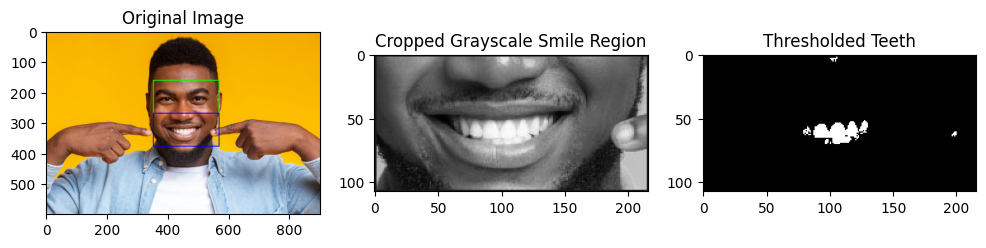

In [32]:
# Load the input image
image_path = "test.jpeg"
frame = cv2.imread(image_path)
process_img(frame)

# cap = cv2.VideoCapture(0)

# if not cap.isOpened():
#     print("Error: Could not open webcam.")
#     exit()

# while True:
#     ret, frame = cap.read()

#     if not ret:
#         print("Error: Could not read frame.")
#         break

#     # Display the frame
#     # cv2.imshow("Live Video", frame)
#     process_img(frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the webcam and close the OpenCV window
# cap.release()
# cv2.destroyAllWindows()